# ML algorithms for heart disease detection

In this laboratory, we worked on
#### 1. Importing libraries
#### 2. Importing DataFrame related to heart disease diagnosis
#### 3. Exploratory Data Analysis (EDA)
#### 4. Data preparation
#### 5. Modeling: supervised vs unsupervised learning


#### **Context**

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.
Content

#### **Description of the dataset**

The variables present in the dataset are as follows:

- `age`: patient's age in years (continuous variable)
- `sex`: patient's gender (0: Female, 1: Male) (binary variable)
- `cp`: type of chest pain experienced by the patient (categorical variable)
- `trestbps`: patient's resting blood pressure in mm Hg (continuous variable)
- `chol`: patient's cholesterol level in mg/dl (continuous variable)
- `fbs`: fasting blood sugar level of the patient (> 120 mg/dl = 1, else = 0) (binary variable)
- `restecg`: resting electrocardiography results of the patient (categorical variable)
- `thalach`: maximum heart rate achieved by the patient (continuous variable)
- `exang`: exercise-induced angina (0: No, 1: Yes) (binary variable)
- `oldpeak`: exercise-induced ST depression relative to rest (continuous variable)
- `slope`: slope of the ST segment during exercise (categorical variable)
- `ca`: number of major blood vessels colored by fluoroscopy (discrete variable)
- `thal`: thallium stress test (thalassemia) (categorical variable)
- `target`: presence of heart disease (0: No disease, 1: Heart disease) (binary variable)

These variables are used to analyze risk factors and symptoms associated with heart diseases.

# Import the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries for data processing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


In [1]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

# Import the dataframe

In [3]:

data = pd.read_csv('data/heart.csv')

# Exploratory Data Analysis (EDA)

- Display the first five rows of the DataFrame to understand the variables

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


- Display the last five rows of the DataFrame to understand the variables

In [5]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


 - Explore information about the structure, data types, and memory usage of the DataFrame.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


- Generate descriptive statistics of a DataFrame

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


- Shape of the data

In [8]:
data.shape

(1025, 14)

-  Create a histogram of the `age` variable

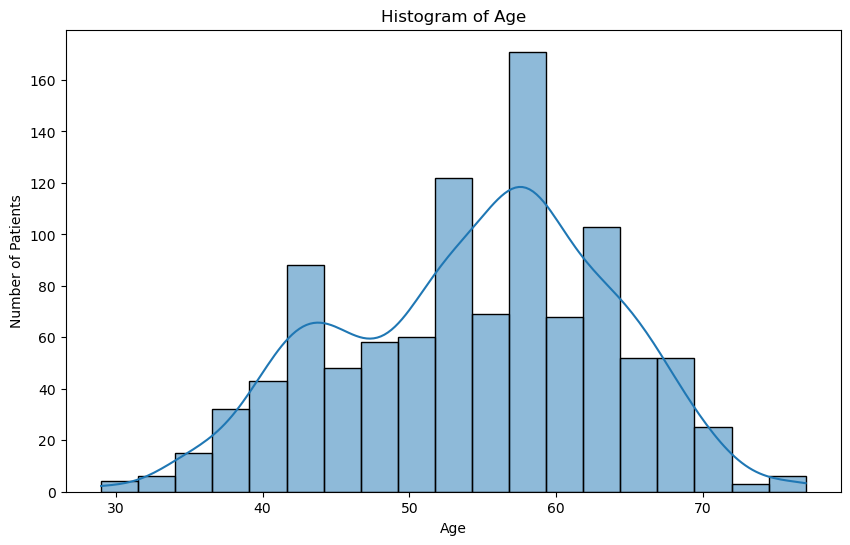

In [9]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram using Seaborn
sns.histplot(data['age'], kde=True)

# Add title and labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')

# Show the plot
plt.show()

- Creating a histogram of the `chol` variable (cholesterol level)

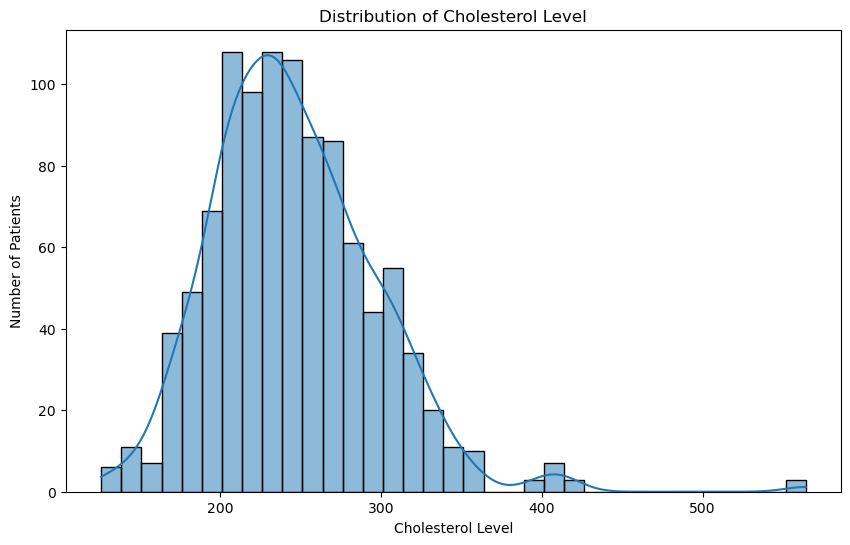

In [10]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram using Seaborn
sns.histplot(data['chol'], kde=True)

# Add title and labels
plt.title('Distribution of Cholesterol Level')
plt.xlabel('Cholesterol Level')
plt.ylabel('Number of Patients')

# Show the plot
plt.show()


-  Creating a countplot to visualize the presence of heart disease by gender to show the counts of observations in each category using bars

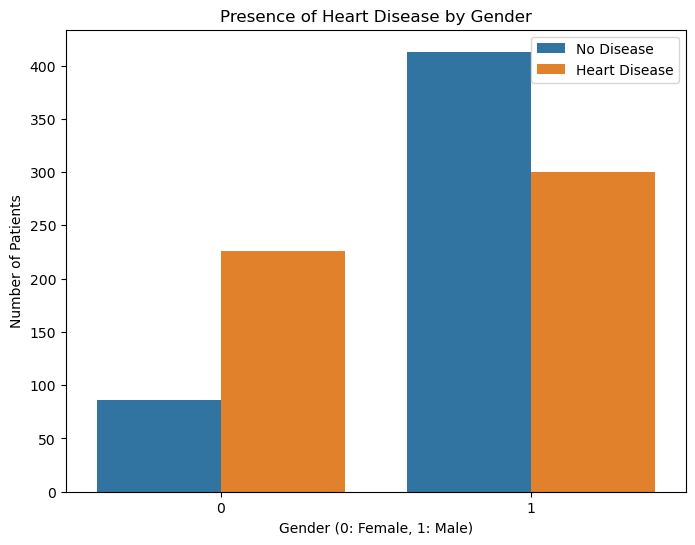

In [11]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a countplot using Seaborn
sns.countplot(x='sex', data=data, hue='target')

# Add title and labels
plt.title('Presence of Heart Disease by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Number of Patients')
plt.legend(['No Disease', 'Heart Disease'])

# Show the plot
plt.show()

- Create a heatmap of the correlation matrix to compute the correlation coefficients between all pairs of variables in the DataFrame 

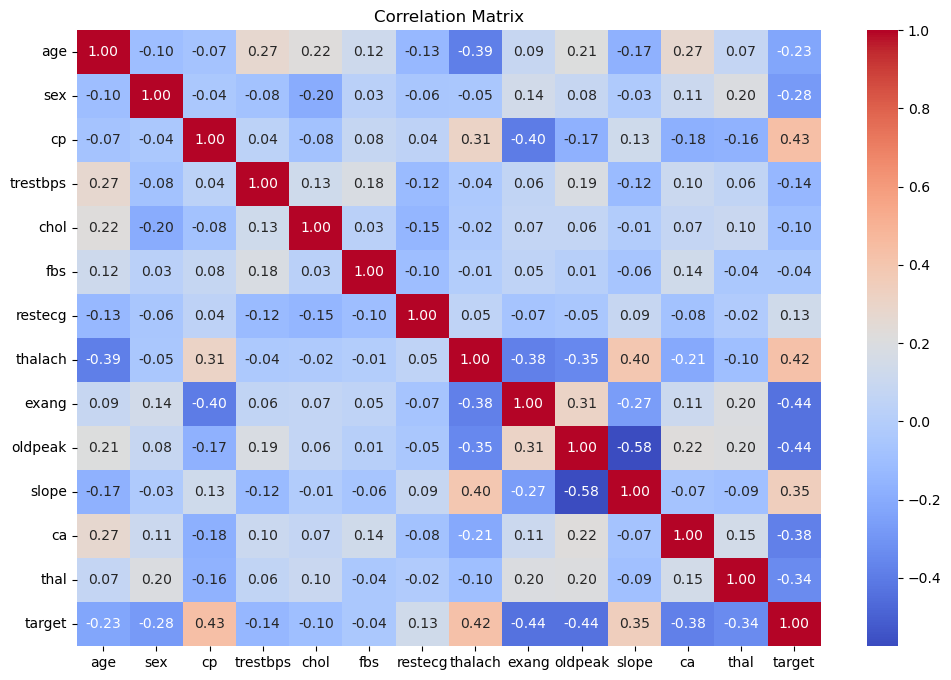

In [12]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a heatmap using Seaborn
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


The colors represent the strength and direction of the correlation (cool colors for negative correlation, warm colors for positive correlation). 

The resulting plot provides a visual representation of how each variable correlates with every other variable in the dataset

- Creating a scatter plot to visualize the relationship between age and cholesterol levels

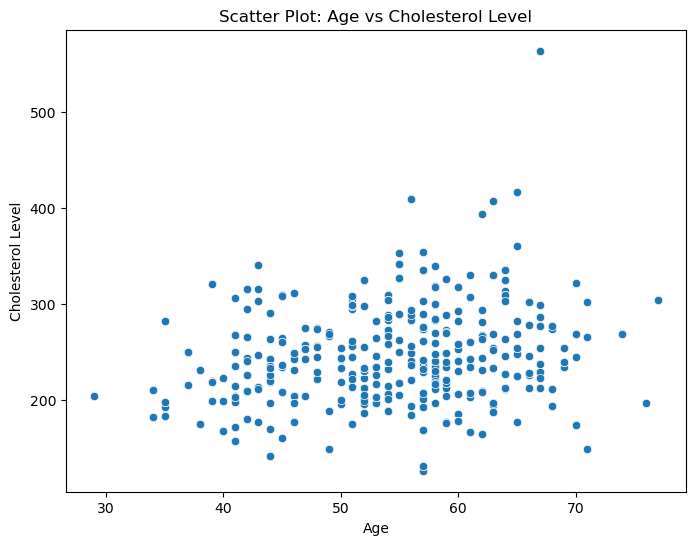

In [13]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a scatter plot using Seaborn
sns.scatterplot(x='age', y='chol', data=data)

# Add title and labels
plt.title('Scatter Plot: Age vs Cholesterol Level')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')

# Show the plot
plt.show()


- Creating a pair plot to visualize the relationships between the variables 'age', 'chol', 'thalach', and 'trestbps' to generates a grid of scatter plots where each variable is plotted against every other variable in the selected subset `['age', 'chol', 'thalach', 'trestbps']`.
The diagonal of the grid displays histograms for each individual variable. The pair plot is useful for quickly visualizing the relationships and distributions between multiple variables in the dataset.

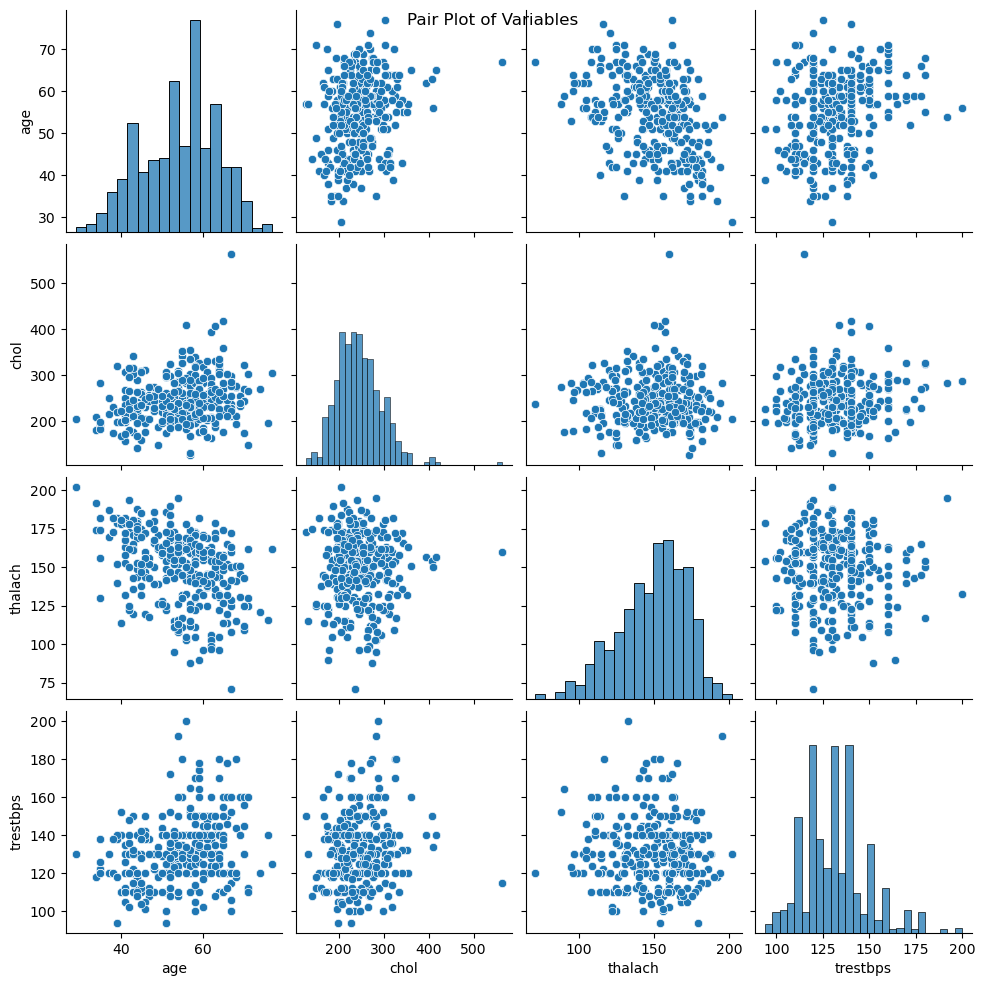

In [14]:
# Create a pair plot using Seaborn
sns.pairplot(data[['age', 'chol', 'thalach', 'trestbps']])

# Add a title
plt.suptitle('Pair Plot of Variables')

# Show the plot
plt.show()


**Note:** We can plot the pair plot between all the variables in the dataset using:


```python
sns.pairplot(data)
```

- Creating boxplots to visualize the distribution and identify outliers for the variables `age`, `chol`, `thalach`, and `trestbps` to generate a boxplot for each variable, providing a visual representation of the distribution, central tendency, and presence of outliers. Here, the x-axis represents the variables, and the y-axis represents the values.

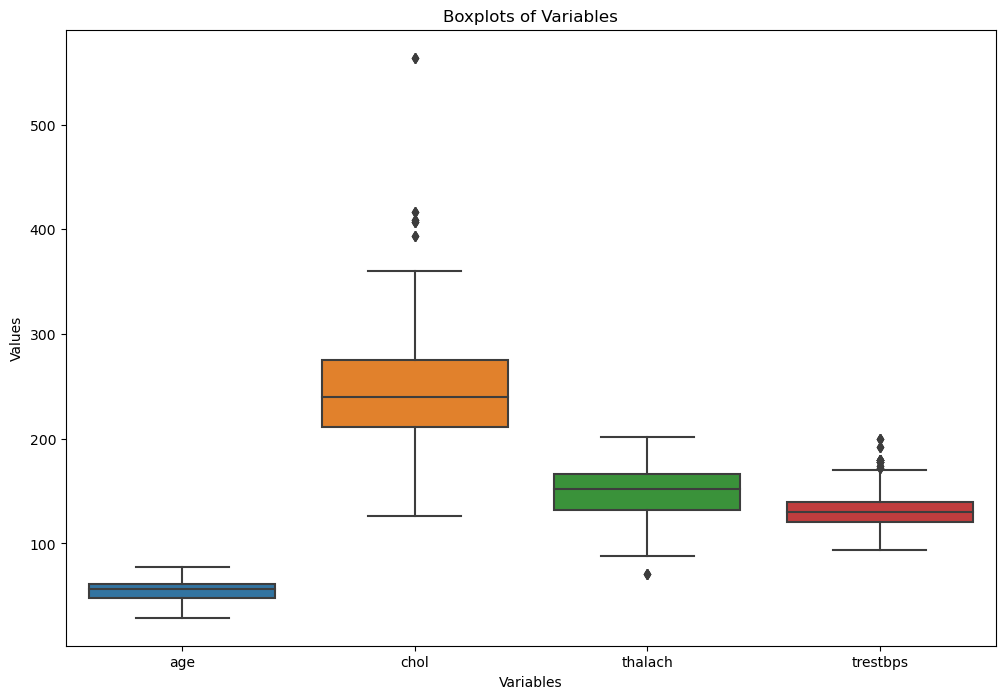

In [15]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create boxplots using Seaborn
sns.boxplot(data=data[['age', 'chol', 'thalach', 'trestbps']])

# Add title and labels
plt.title('Boxplots of Variables')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the plot
plt.show()


**Note:** We can plot the boxplots between all the variables in the dataset using:


```python
sns.boxplot(data=data)
```

# Data Preparation

- Handle outliers using the mean. We calculate the lower and upper bounds based on the interquartile range (IQR) and replaces any values outside this range with the mean of the respective column.

**Note:** We compute for each variable:

- Q1: The first quantile (`25%`)
- Q3: The third quantile (`75%`)
- $IQR = Q3 - Q1$
- The $lower_{bound}  = Q1 - 1.5 * IQR$
- The $upper_{bound} = Q3 + 1.5 * IQR$

After that, we replace the outliers by lower and upper bounds

In [16]:
for col in data.columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), data[col].mean(), data[col])

- Check if there are still any outliers or not

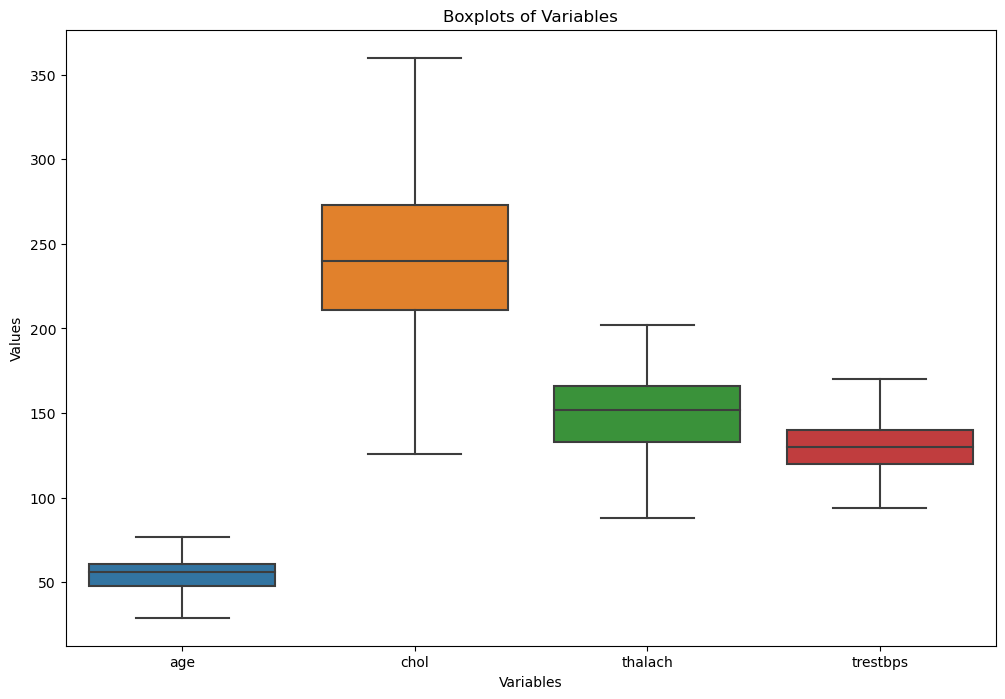

In [17]:
plt.figure(figsize=(12, 8))

# Create boxplots using Seaborn
sns.boxplot(data=data[['age', 'chol', 'thalach', 'trestbps']])

# Add title and labels
plt.title('Boxplots of Variables')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the plot
plt.show()

We now need to identify the categorical and numerical columns in the DataFrame. In `sklearn` library the categorical variable must be transformed (`encoderd`).

In [18]:
# selects columns with data types 'object', which typically represents categorical variables. 
# The tolist() method converts the column names to a list
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

#  selects columns with data types 'int' and 'float', which represent numerical variables.
numerical_cols = data.select_dtypes(include=['int', 'float']).columns.tolist()

# print the list of categorical column names.
print("Categorical column:", categorical_cols)

#  print the list of numerical column names.
print("Numerical column:", numerical_cols)


Categorical column: []
Numerical column: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


Indeed, there are not categorical variables because are already encoded, causing them to be treated as numerical (binary) variables. We have to manage manually.

In [19]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

From the statistics describtion of the data (`data.discribe()`), we can see the numerical columns must be scaled and the categorical columns must be encoded

 - Normalizing numeric variables with [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [20]:
df_processed = data.copy()

scaler = StandardScaler()
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

- Encoding categorical variables with [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [21]:
label_encoder = LabelEncoder()
df_processed[categorical_cols] = df_processed[categorical_cols].apply(lambda col: label_encoder.fit_transform(col))

# Modelling

In this modelling phase we use:
<ol>
 <li>Supervised learning</li>
    <ul>
    <li>KNN</li>
    </ul>
 <li>Unsupervised learning</li>
     <ul>
      <li>Kmean</li>
      <li>PCA</li>   
    </ul> 
</ol>
For the supervised learning our target is `target`

## Supervised learning

In supervised learning we need to split the de data in to parts or sets; features and target.
 - Target is the column `target`
 - Features are all the columns except the target

In [22]:
features = df_processed.drop('target', axis=1)
target = df_processed['target']

- Split the data into training set and testing set using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

- Display the shape of the splited sets: `X_train, X_test, y_train, y_test`

In [24]:
# X_train.shape, X_test.shape, y_train.shape, y_test.shape
print(f'The shape of training features is: {X_train.shape}')
print(f'The shape of training target is: {y_train.shape}')

print(f'The shape of testing features is: {X_test.shape}')
print(f'The shape of testing target is: {y_test.shape}')

The shape of training features is: (820, 13)
The shape of training target is: (820,)
The shape of testing features is: (205, 13)
The shape of testing target is: (205,)


### k-Nearest Neighbors (k-NN) classifier
- Implementing a k-Nearest Neighbors (k-NN) classifier using `KNeighborsClassifier`. 


**Steps**:

1. Importing the k-NN classifier from scikit-learn: 

`from sklearn.neighbors import KNeighborsClassifier`

2. Creating an instance of the k-NN classifier with `n_neighbors`:

`knn = KNeighborsClassifier(n_neighbors=5)`

3.  Training the classifier using the training data `X_train` (features) and `y_train` (labels):

`knn.fit()`

4. Making predictions on the test data `X_test` and storing the predicted labels in `y_pred`:

`y_pred = knn.predict(X_test)`


In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiation of the 5-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Training the classifier on the training data
knn.fit(X_train, y_train)

# Prediction on the test data
y_pred = knn.predict(X_test)

Calculating various performance metrics for a classification model using couple of metrics: 

 
- [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html): The accuracy score is a measure of the overall correctness of a classification model. It is calculated as the ratio of correctly predicted instances to the total number of instances. The mathematical formula for accuracy score is:

$$ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} $$
Mathematically, if we have:
- \( TP \) (True Positives): the number of instances correctly predicted as positive,
- \( TN \) (True Negatives): the number of instances correctly predicted as negative,
- \( FP \) (False Positives): the number of instances incorrectly predicted as positive,
- \( FN \) (False Negatives): the number of instances incorrectly predicted as negative,
then the accuracy can be expressed as:
$$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

- [precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html): Precision is a metric used in classification to measure the accuracy of the positive predictions made by a model. It is calculated as the ratio of true positive predictions to the total number of positive predictions (both true positives and false positives). The precision formula is given by:

$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}} $$


- [recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html): Recall, also known as sensitivity or true positive rate, is a metric in classification that measures the ability of a model to identify all relevant instances of a class. It is calculated as the ratio of true positive predictions to the total number of actual positive instances (true positives and false negatives). The recall formula is given by:

$$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}$$


- [f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html): The F1 score is a metric in classification that combines precision and recall into a single measure. It is the harmonic mean of precision and recall and is particularly useful when there is an uneven class distribution (imbalanced datasets). The F1 score is calculated using the following formula:
$$\text{F1 Score} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$
the F1 score can be expressed as:
$$\text{F1 Score} = \frac{2 \times \frac{\text{True Positives}}{\text{True Positives + False Positives}} \times \frac{\text{True Positives}}{\text{True Positives + False Negatives}}}{\frac{\text{True Positives}}{\text{True Positives + False Positives}} + \frac{\text{True Positives}}{\text{True Positives + False Negatives}}}$$



In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculation of accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculation of precision
precision = precision_score(y_test, y_pred)

# Calculation of recall
recall = recall_score(y_test, y_pred)

# Calculation of F1 score
f1 = f1_score(y_test, y_pred)

# Displaying the results
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))


Accuracy: 82.93%
Precision: 80.91%
Recall: 86.41%
F1 Score: 83.57%


- Choose an appropriate value that provides the best accuracy for the dataset and evaluate the performance of the k-NN classifier for different values of k.

In [27]:
results = []

# Testing different values of k from 1 to 10
for k in range(1, 11):
    # Instantiation of the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Training the classifier on the training data
    knn.fit(X_train, y_train)

    # Prediction on the test data
    y_pred = knn.predict(X_test)

    # Calculation of accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Adding results to the list
    results.append((k, accuracy))

# Creating a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['k', 'Accuracy'])

# Displaying the results table
print(results_df)


    k  Accuracy
0   1  1.000000
1   2  0.990244
2   3  0.941463
3   4  0.882927
4   5  0.829268
5   6  0.829268
6   7  0.824390
7   8  0.824390
8   9  0.839024
9  10  0.843902


- Plotting the results

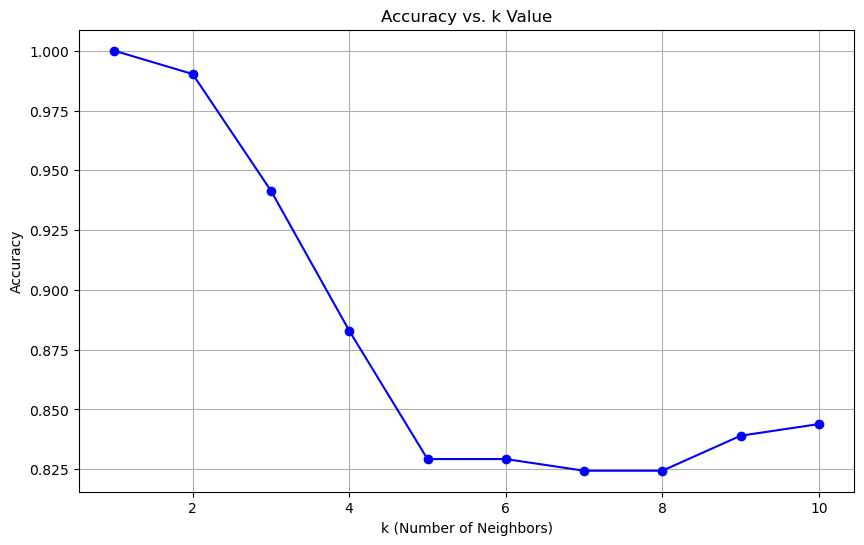

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['k'], results_df['Accuracy'], marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. k Value')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

**The best value of k is $1$**

## Unsupervised learning

### [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- PCA: Principal Component Analysis is a dimensionality reduction technique. It aims to transform the original features into a new set of uncorrelated features, called principal components, while retaining as much of the original variability as possible. It helps in capturing the most important information in the data while discarding less important details

How PCA works:

1. **Centering the Data:** Subtract the mean of each feature from the dataset, so that each feature has a mean of zero.

2. **Computing the Covariance Matrix:** Calculate the covariance matrix of the centered data. The covariance matrix expresses the relationships between different features.

3. **Calculating Eigenvalues and Eigenvectors:** Find the eigenvalues and corresponding eigenvectors of the covariance matrix. The eigenvectors represent the directions of maximum variance, and the eigenvalues indicate the magnitude of variance in each direction.

4. **Sorting Eigenvalues:** Sort the eigenvalues in descending order. The corresponding eigenvectors will also be reordered accordingly.

5. **Choosing Principal Components:** Select the top k eigenvectors based on the desired number of dimensions or the explained variance.

6. **Creating the Projection Matrix:** Form a projection matrix using the selected eigenvectors.

7. **Transforming the Data:** Multiply the original data by the projection matrix to obtain the new set of uncorrelated features (principal components).


```python
# Assuming X is the data matrix
pca = PCA(n_components=2)  # Specify the desired number of components
X_pca = pca.fit_transform(X)
```
The transformed data, `X_pca`, will have reduced dimensions based on the specified number of components.

In [29]:
from sklearn.decomposition import PCA

# Select features for PCA
features = data.drop('target', axis=1)

# Perform data preprocessing by normalizing features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)




### [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- Kmean is a popular clustering algorithm used for partitioning a dataset into a specified number of clusters (k). The algorithm aims to group similar data points together and assign them to clusters based on their features. 

How `KMeans` works:

1. **Initialization:** Randomly initialize k cluster centroids.

2. **Assignment:** Assign each data point to the nearest centroid, forming k clusters.

3. **Update Centroids:** Recalculate the centroids as the mean of all data points assigned to each cluster.

4. **Repeat:** Repeat steps 2 and 3 until convergence (when the centroids no longer change significantly).



In Python, we can use `KMeans` from the scikit-learn library:

```python
from sklearn.cluster import KMeans

# Assuming X is the data matrix
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Get cluster assignments and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
```



- `n_clusters`: Specifies the number of clusters (k) to form.
- `random_state`: Seed for random number generation, providing reproducibility.

After fitting the model, we can access the cluster assignments for each data point using `kmeans.labels_` and the final cluster centroids using `kmeans.cluster_centers_`.


In [30]:
from sklearn.cluster import KMeans


# instanciate the  k-means cluster and fit the data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(features)

# Get cluster assignments and centroids
cluster_labels_kmean = kmeans.labels_

# Display the cluster for the first observations
print(cluster_labels_kmean[:10])

# Display the the first observations of the real label
print(target[:10])

[0 0 0 0 1 0 1 1 0 1]
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    1.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: target, dtype: float64


- We can use get an optimal inertia (`n_clusters`) using the PCA

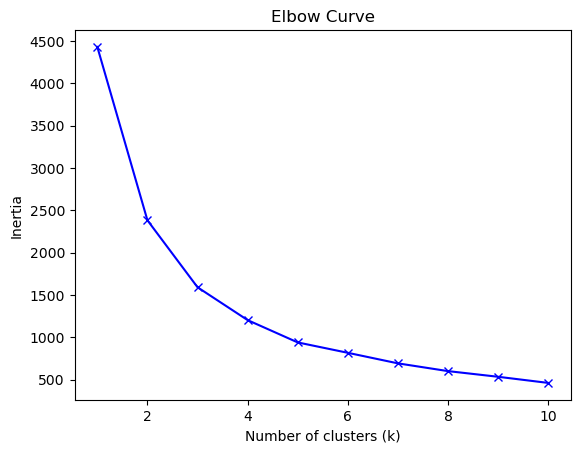

In [31]:
# Calculate inertia for different values of k
inertias = []
k_values = range(1, 11)  # Test from 1 to 10 clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    inertias.append(kmeans.inertia_)

# Display the elbow curve
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

The best value is $2$

- We can use `KMeans` with the PCA-transformed data

In [32]:
# Apply the pca_result for the PCA-transformed data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_result)

# Get cluster assignments and centroids
cluster_labels_pca = kmeans.labels_
centroids_pca = kmeans.cluster_centers_

# Display the cluster for the first observations
print(cluster_labels_pca[:10])

# Display the the first observations of the real label
print(target[:10])



[0 1 1 0 1 0 1 1 0 1]
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    1.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: target, dtype: float64


- Creating a scatter plot to visualize the clusters formed by the Kmeans algorithm

In [33]:
# Add cluster labels to the dataframe
data['Cluster_kmean2'] = cluster_labels_kmean

# Split the data based on the target variable
target_kmean_0 = data[data['target'] == 0]
target_kmean_1 = data[data['target'] == 1]

# Create a scatter plot for the clusters
plt.scatter(target_kmean_kmean_0['age'], target_kmean_0['chol'], c='blue', label='Target 0')
plt.scatter(target_kmean_1['age'], target_kmean_1['chol'], c='red', label='Target 1')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Clustering of Heart Diseases')
plt.legend()
plt.show()


NameError: name 'target_kmean_kmean_0' is not defined

- Plot a 3D graphing to show the clusters

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting tools

# Add cluster labels to the dataframe
data['Cluster_kmean3'] = cluster_labels_kmean

# Create a 3D scatter plot for the clusters using three features
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data[data['target'] == 0]['age'], data[data['target'] == 0]['chol'], data[data['target'] == 0]['thalach'], c='blue', label='Target 0')
ax.scatter(data[data['target'] == 1]['age'], data[data['target'] == 1]['chol'], data[data['target'] == 1]['thalach'], c='red', label='Target 1')

ax.set_xlabel('Age')
ax.set_ylabel('Cholesterol')
ax.set_zlabel('Thalach')
ax.set_title('3D Clustering of Heart Diseases')
ax.legend()

plt.show()


- Creating a scatter plot to visualize the clusters formed by the Kmeans algorithm with PCA-transformed

In [ ]:

# Add cluster labels to the dataframe
data['Cluster_pca'] = cluster_labels_pca

# Split the data based on the target variable
cluster_pca_0 = data[data['Cluster_pca'] == 0]
cluster_pca_1 = data[data['Cluster_pca'] == 1]

# Create a scatter plot for the clusters on the principal components
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels_pca)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Clustering of Heart Diseases with PCA')
plt.show()
